In [169]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os




In [3]:
cityDataToLoad = os.path.join("Resources", "city_data.csv")
rideDataToLoad = os.path.join("Resources", "ride_data.csv")

In [4]:
# Read the city data file and store it in a pandas DataFrame.
cityDataDF = pd.read_csv(cityDataToLoad)
cityDataDF.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
rideDataDF = pd.read_csv(rideDataToLoad)
rideDataDF.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# RIDE DATA
# Get total number of rows and columns 
print(cityDataDF.count())
# Get the columns and the rows that are not null.
print(cityDataDF.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [7]:
# Get the data types of each column
cityDataDF.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
cityDataDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the each city type.
print(sum(cityDataDF["type"] == "Urban"))
print(sum(cityDataDF["type"] == "Suburban"))
print(sum(cityDataDF["type"] == "Rural"))

66
36
18


In [10]:
# RIDE DATA:

# Get total number of rows and columns 
print(rideDataDF.count())
# Get the columns and the rows that are not null.
print(rideDataDF.isnull().sum())


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [11]:
# Get the data types of each column.
rideDataDF.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Combine the data into a single dataset
pyberDataDF = pd.merge(rideDataDF, cityDataDF, on=["city","city"], how="left")
# Display the dataframe
pyberDataDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# **********************************
# BUBLE CHART
# **********************************

# Get Number of Rides for Each City Type
# --------------------------------------------------------------
# Create the Urban, Suburban and Rural city DataFrame.
urbanCitiesDF = pyberDataDF[pyberDataDF["type"] == "Urban"]
suburbanCitiesDF = pyberDataDF[pyberDataDF["type"] == "Suburban"]
ruralCitiesDF = pyberDataDF[pyberDataDF["type"] == "Rural"]
ruralCitiesDF.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [14]:
# Get the number of rides for urban, suburban and rural cities.
urbanRideCount = urbanCitiesDF.groupby("city").count()["ride_id"]
suburbanRideCount = suburbanCitiesDF.groupby("city").count()["ride_id"]
ruralRideCount = ruralCitiesDF.groupby("city").count()["ride_id"]
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [16]:
# Get the Average Fare for Each City Type
# ------------------------------------------------------------------
# Get average fare for each city in each type of city.
urbanAvgFare = urbanCitiesDF.groupby("city").mean()["fare"] 
suburbanAvgFare = suburbanCitiesDF.groupby("city").mean()["fare"] 
ruralAvgFare = ruralCitiesDF.groupby("city").mean()["fare"] 

urbanAvgFare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get the Average Number of Drivers for Each City Type
# --------------------------------------------------------------------
# Get the average number of drivers for each type of city.
urbanDriverCount = urbanCitiesDF.groupby("city").mean()["driver_count"]
suburbanDriverCount = suburbanCitiesDF.groupby("city").mean()["driver_count"]
ruralDriverCount = ruralCitiesDF.groupby("city").mean()["driver_count"]
urbanDriverCount.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

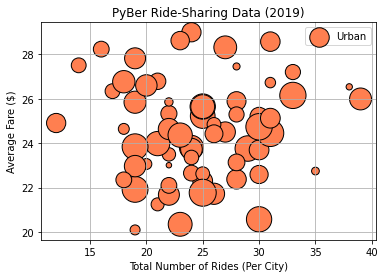

In [31]:
# Individual scatter plot per city type (MATLAB method)
# -----------------------------------------------------
# Build the scatter plots for urban cities.
plt.scatter(urbanRideCount, 
    urbanAvgFare, 
    label="Urban", 
    color="coral", 
    edgecolors="black",
    linewidths=1,
    s=10*urbanDriverCount)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()


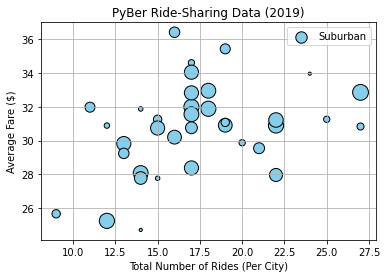

In [32]:
# Build the scatter plots for suburban cities.
plt.scatter(suburbanRideCount, 
    suburbanAvgFare, 
    label="Suburban", 
    color="SkyBlue", 
    edgecolors="black",
    linewidths=1,
    s=10*suburbanDriverCount)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

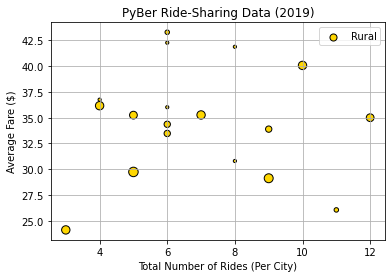

In [33]:
# Build the scatter plots for suburban cities.
plt.scatter(ruralRideCount,
    ruralAvgFare,
    label="Rural",
    color="gold",
    edgecolors="black",
    linewidths=1,
    s=10*ruralDriverCount)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

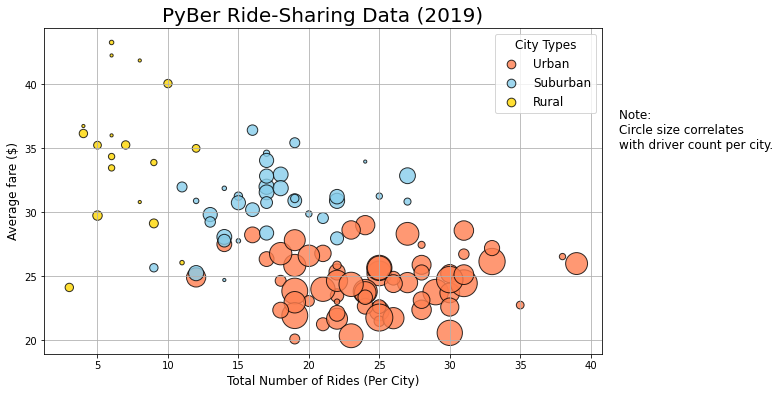

In [51]:
# Combine all three individual buble charts into one
# ---------------------------------------------------------
plt.subplots(figsize=(10,6))
plt.scatter(urbanRideCount, urbanAvgFare, label="Urban",
    color="coral", edgecolors="black", linewidths=1,
    s=10*urbanDriverCount, alpha=0.8)
plt.scatter(suburbanRideCount, suburbanAvgFare, label="Suburban",
    color="SkyBlue", edgecolors="black", linewidths=1,
    s=10*suburbanDriverCount, alpha=0.8)
plt.scatter(ruralRideCount, ruralAvgFare, label="Rural",
    color="gold", edgecolors="black", linewidths=1,
    s=10*ruralDriverCount, alpha=0.8)
# Set title, axes labels and legend and fonts
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average fare ($)", fontsize=12)
plt.grid(True)

# Customize legend (and avoid automatic size)
lgnd = plt.legend(fontsize=12, mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size. (with text() function giving x and y coordinates and the text)
plt.text(42,35,"Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Display the plot
plt.show()


In [52]:
# **********************************************
# SUMMARY STATISTICS FOR NUMBER OF RIDES
# **********************************************

# Urban summary statistics.
urbanCitiesDF.describe()


,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [53]:
# Suburban summary statistics.
suburbanCitiesDF.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [54]:
# Rural summary statistics
ruralCitiesDF.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [58]:
# Urban,Suburban and Rural rides summary statistics
print(urbanRideCount.describe())
print(suburbanRideCount.describe())
print(ruralRideCount.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64 count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [60]:
# Pandas mean, median and mode functions
# ----------------------------------------------------------

# Calculate the mean of the ride count for each city type.
round(urbanRideCount.mean(),2),round(suburbanRideCount.mean(),2),round(ruralRideCount.mean(),2)

(24.62, 17.36, 6.94)

In [61]:
# Calculate the median of the ride count for each city type.
round(urbanRideCount.median(),2),round(suburbanRideCount.median(),2),round(ruralRideCount.median(),2)

(24.0, 17.0, 6.0)

In [63]:
# Calculate the mode of the ride count for each city type.
print(urbanRideCount.mode())
print(suburbanRideCount.mode())
print(ruralRideCount.mode())

0    22
1    25
dtype: int64
0    17
dtype: int64
0    6
dtype: int64


In [71]:
# Numpy mean, median and SciPy mode functions
# ----------------------------------------------------------
import numpy as np
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities.
meanUrbanRideCount = np.mean(urbanRideCount)
print(f"The mean for the ride counts for urban trips is {meanUrbanRideCount:.2f}.")
medianUrbanRideCount = np.median(urbanRideCount)
print(f"The median for the ride counts for urban trips is {medianUrbanRideCount:.2f}.")
modeUrbanRideCount = sts.mode(urbanRideCount)
print(f"The mode for the ride counts for urban trips is {modeUrbanRideCount}.")
print()

# Calculate the measures of central tendency for the ride count for the suburban cities.
meanSuburbanRideCount = np.mean(suburbanRideCount)
print(f"The mean for the ride counts for suburban trips is {meanSuburbanRideCount:.2f}.")
medianSuburbanRideCount = np.median(suburbanRideCount)
print(f"The median for the ride counts for suburban trips is {medianSuburbanRideCount:.2f}.")
modeSuburbanRideCount = sts.mode(suburbanRideCount)
print(f"The mode for the ride counts for suburban trips is {modeSuburbanRideCount}.")
print()

# Calculate the measures of central tendency for the ride count for the rural cities.
meanRuralRideCount = np.mean(ruralRideCount)
print(f"The mean for the ride counts for rural trips is {meanRuralRideCount:.2f}.")
medianRuralRideCount = np.median(ruralRideCount)
print(f"The median for the ride counts for rural trips is {medianRuralRideCount:.2f}.")
modeRuralRideCount = sts.mode(ruralRideCount)
print(f"The mode for the ride counts for rural trips is {modeRuralRideCount}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [74]:
# **********************************************
# SUMMARY STATISTICS FOR FARE BY CITY TYPE
# **********************************************

# Get the fares for the each city type.
urbanFares = urbanCitiesDF["fare"]
suburbanFares = suburbanCitiesDF["fare"]
ruralFares = ruralCitiesDF["fare"]

In [78]:
# Calculate the measures of central tendency for the urban fares
meanUrbanFares = np.mean(urbanFares)
print(f"The mean fare price for urban trips is ${meanUrbanFares:.2f}.")
medianUrbanFares = np.median(urbanFares)
print(f"The median fare price for urban trips is ${medianUrbanFares:.2f}.")
modeUrbanFares = sts.mode(urbanFares)
print(f"The mode fare price for urban trips is ${modeUrbanFares}.")
print()

# Calculate the measures of central tendency for the suburban fares
meanSuburbanFares = np.mean(suburbanFares)
print(f"The mean fare price for suburban trips is ${meanSuburbanFares:.2f}.")
medianSuburbanFares = np.median(suburbanFares)
print(f"The median fare price for suburban trips is ${medianSuburbanFares:.2f}.")
modeSuburbanFares = sts.mode(suburbanFares)
print(f"The mode fare price for suburban trips is ${modeSuburbanFares}.")
print()

# Calculate the measures of central tendency for the rural fares
meanRuralFares = np.mean(ruralFares)
print(f"The mean fare price for rural trips is ${meanRuralFares:.2f}.")
medianRuralFares = np.median(ruralFares)
print(f"The median fare price for rural trips is ${medianRuralFares:.2f}.")
modeRuralFares = sts.mode(ruralFares)
print(f"The mode fare price for rural trips is ${modeRuralFares}.")




The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [80]:
# ***************************************************************
# SUMMARY STATISTICS FOR NUMBER OF DRIVERS BY CITY TYPE
# ***************************************************************

# Get the driver count data from echa city type.
urbanDrivers = urbanCitiesDF["driver_count"]
suburbanDrivers = suburbanCitiesDF["driver_count"]
ruralDrivers = ruralCitiesDF["driver_count"]

In [87]:
# Calculate the measures of central tendency for the urban drivers
meanUrbanDrivers = np.mean(urbanDrivers)
print(f"The mean number of drivers for urban trips is {meanUrbanDrivers:.2f}.")
medianUrbanDrivers = np.median(urbanDrivers)
print(f"The median number of drivers for urban trips is {medianUrbanDrivers:.2f}.")
modeUrbanDrivers = sts.mode(urbanDrivers)
print(f"The mode number of drivers for urban trips is {modeUrbanDrivers}.")
print()

# Calculate the measures of central tendency for the suburban drivers
meanSuburbanDrivers = np.mean(suburbanDrivers)
print(f"The mean number of drivers for suburban trips is {meanSuburbanDrivers:.2f}.")
medianSuburbanDrivers = np.median(suburbanDrivers)
print(f"The median number of drivers for suburban trips is {medianSuburbanDrivers:.2f}.")
modeSuburbanDrivers = sts.mode(suburbanDrivers)
print(f"The mode number of drivers for suburban trips is {modeSuburbanDrivers}.")
print()

# Calculate the measures of central tendency for the rural drivers
meanRuralDrivers = np.mean(ruralDrivers)
print(f"The mean number of drivers for rural trips is {meanRuralDrivers:.2f}.")
medianRuralDrivers = np.median(ruralDrivers)
print(f"The median number of drivers for rural trips is {medianRuralDrivers:.2f}.")
modeRuralDrivers = sts.mode(ruralDrivers)
print(f"The mode number of drivers for rural trips is {modeRuralDrivers}.")

The mean number of drivers for urban trips is 36.68.
The median number of drivers for urban trips is 37.00.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean number of drivers for suburban trips is 13.71.
The median number of drivers for suburban trips is 16.00.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean number of drivers for rural trips is 4.30.
The median number of drivers for rural trips is 4.00.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


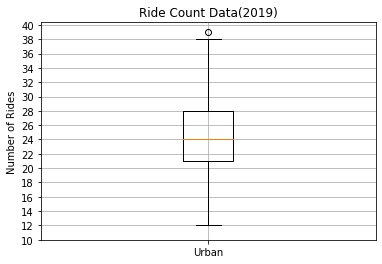

In [91]:
# ***************************************************************
# BOX-AND-WHISKER PLOTS
# ***************************************************************
# Box-and-whisker plot for the ride count
# -----------------------------------------


# Create a box-and-whisker plot for the urban cities ride count.
xLabels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urbanRideCount, labels=xLabels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

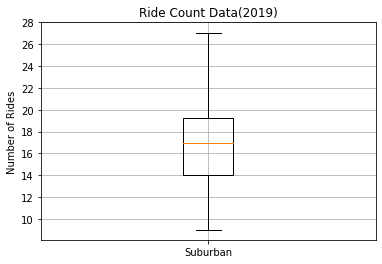

In [94]:
# Create a box-and-whisker plot for the suburban cities ride count.
xLabels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburbanRideCount, labels=xLabels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,30,step=2.0))
ax.grid()
plt.show()

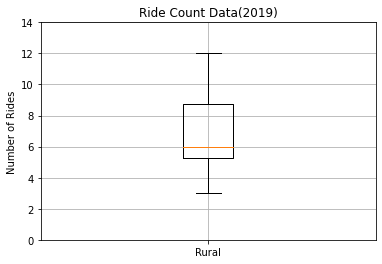

In [97]:
# Create a box-and-whisker plot for the suburban cities ride count.
xLabels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(ruralRideCount, labels=xLabels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,16,step=2.0))
ax.grid()
plt.show()

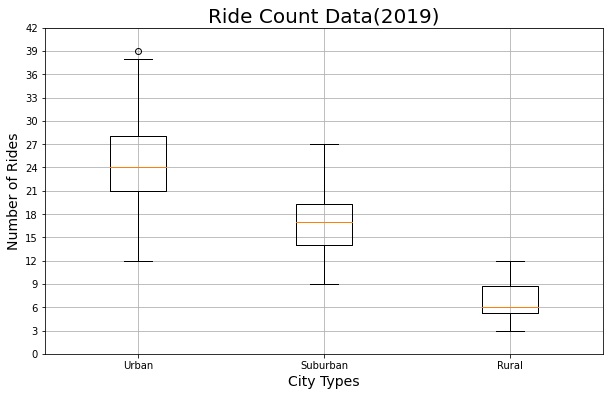

In [102]:
# Combine all three box-and-whisker plots of Ride counts in one chart
# ---------------------------------------------------------------------

xLabels = ["Urban", "Suburban", "Rural"]
rideCountData = [urbanRideCount, suburbanRideCount, ruralRideCount]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(rideCountData, labels=xLabels)
ax.set_title("Ride Count Data(2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [110]:
# Outliers for the ride count
# -------------------------------------------
# Urban city  type has an outlier at 39
# Get the city that matches 39
urbanCityOutlier = urbanRideCount[urbanRideCount==39].index[0]
print(f"{urbanCityOutlier} has the highest rider count.")

West Angela has the highest rider count.


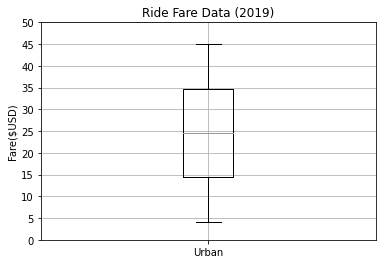

Summary Statistics:


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [118]:
# Box-and-whisker plot for the ride fare data
# --------------------------------------------------

# Create a box-and-whisker plot for the urban fare data.-
xLabels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urbanFares,labels=xLabels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics:")
urbanFares.describe()

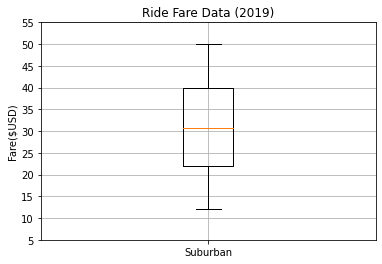

Summary Statistics:


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [121]:
# Create a box-and-whisker plot for the suburban fare data.-
xLabels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburbanFares,labels=xLabels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5,60,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics:")
suburbanFares.describe()

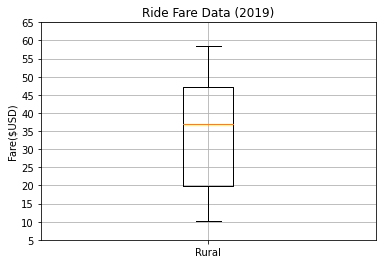

Summary Statistics:


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [124]:
# Create a box-and-whisker plot for the rural fare data.
xLabels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(ruralFares,labels=xLabels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5,65,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics:")
ruralFares.describe()

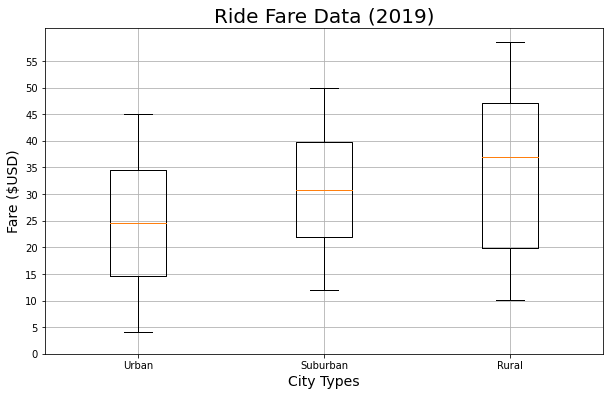

In [131]:
# Combine all three box-and-whisker plots for Fare data in one chart
# ---------------------------------------------------------------------

xLabels = ["Urban", "Suburban", "Rural"]
faresData = [urbanFares, suburbanFares, ruralFares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(faresData, labels=xLabels)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid()

# Save image
plt.savefig("analysis/Fig3.png")

# Display boxplot
plt.show()

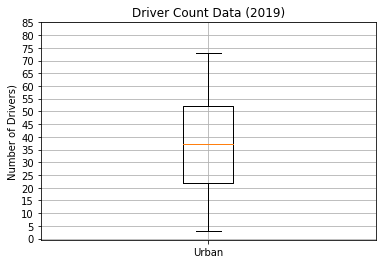

Summary statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [137]:
# Box-and-whisker plot for the driver count data
# --------------------------------------------------

# Create the box-and-whisker plot for the urban driver count data.
xLabels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urbanDrivers, labels=xLabels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()

# Summary statistics
print("Summary statistics:")
urbanDrivers.describe()

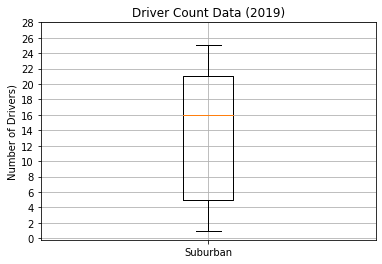

Summary statistics:


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [142]:
# Box-and-whisker plot for the suburban driver count data.
xLabels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburbanDrivers, labels=xLabels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,30,step=2.0))
ax.grid()
plt.show()

# Summary statistics
print("Summary statistics:")
suburbanDrivers.describe()

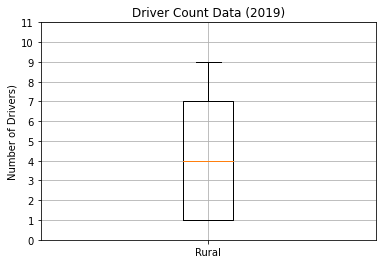

Summary statistics:


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [147]:
# Create the box-and-whisker plot for the rural driver count data.
xLabels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(ruralDrivers, labels=xLabels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,12,step=1.0))
ax.grid()
plt.show()

# Summary statistics
print("Summary statistics:")
ruralDrivers.describe()

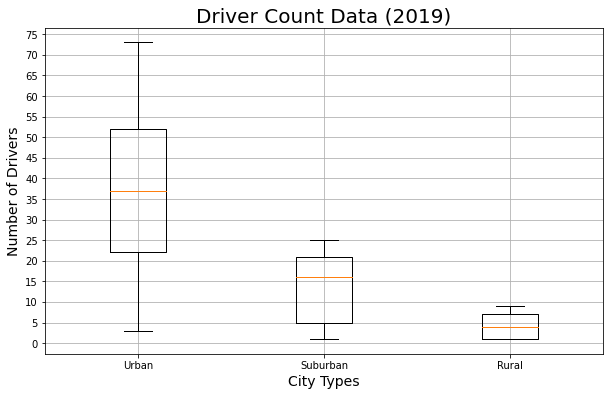

In [152]:
# Combine all three box-and-whisker plots for Driver count data in one chart
# -------------------------------------------------------------------------------

xLabels = ["Urban", "Suburban", "Rural"]
driversData = [urbanDrivers, suburbanDrivers, ruralDrivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driversData, labels=xLabels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()

# Save the plot
plt.savefig("analysis/Fig4.png")

# Display the plot
plt.show()


In [159]:
# ***************************************************************
# PIE CHARTS
# ***************************************************************
# Pie Chart - % of Fare by City Type
# -----------------------------------

# Get the sum of the fares for each city type.
sumFaresByType = pyberDataDF.groupby(["type"]).sum()["fare"]
print(sumFaresByType)

# Get the sum of all the fares.
totalFares = pyberDataDF["fare"].sum()
print(totalFares)

# Calculate the percentage of fare for each city type.
farePercents = sumFaresByType/totalFares * 100
print(typePercentages)

# In one line
farePercents = pyberDataDF.groupby(["type"]).sum()["fare"] / pyberDataDF["fare"].sum() * 100
print(typePercentages)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
63538.64
type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64
type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


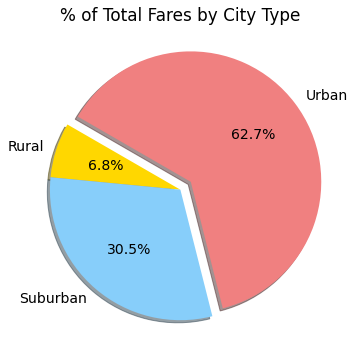

In [174]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mlp
# Build the percentage of fares by city type pie chart - MATLAB method
plt.subplots(figsize=(10, 6))
plt.pie(farePercents, 
    labels=["Rural","Suburban", "Urban"], 
    colors=["gold","lightSkyBlue","lightcoral"],
    explode=[0,0,0.1],
    autopct="%1.1f%%",
    shadow=True,
    startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size of 10 to 14 with matplotlib != matplotlib.pyplot
mpl.rcParams["font.size"]=14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [177]:
# Pie Chart - % of Rides by City Type
# ----------------------------------------

# Calculate the percentage of rides for each city type.
ridePercents = pyberDataDF.groupby(["type"]).count()["ride_id"] / pyberDataDF.count()["ride_id"] * 100
ridePercents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

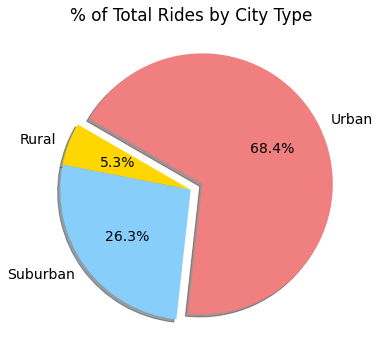

In [180]:

# Build the percentage of rides by city type pie chart - MATLAB method
plt.subplots(figsize=(10,6))
plt.pie(ridePercents, 
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold","lightSkyBlue","lightcoral"],
    explode=[0,0,0.1],
    autopct="%1.1f%%",
    shadow=True,
    startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size of 10 to 14 with matplotlib != matplotlib.pyplot
mpl.rcParams["font.size"]=14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Display figure
plt.show()
